## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest


In [2]:


train = pd.read_csv("train.csv")
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-01,Delhi,Cochin,17:10:00,01:30:00,500,1.0,No info,6628
1,Air India,2019-03-27,Delhi,Cochin,13:30:00,08:15:00,1125,1.0,No info,6681
2,Jet Airways,2019-03-06,Mumbai,Hyderabad,07:10:00,08:35:00,85,0.0,No info,9536
3,Jet Airways,2019-06-12,Kolkata,Banglore,14:05:00,09:20:00,1155,1.0,In-flight meal not included,8529
4,Air India,2019-03-24,Banglore,New Delhi,21:05:00,23:55:00,170,0.0,No info,4441
...,...,...,...,...,...,...,...,...,...,...
635,Spicejet,2019-05-24,Kolkata,Banglore,15:55:00,21:25:00,330,1.0,No info,7804
636,Jet Airways,2019-06-06,Delhi,Cochin,19:45:00,04:25:00,520,1.0,No info,14714
637,Air India,2019-06-27,Delhi,Cochin,14:10:00,17:10:00,180,0.0,No info,5201
638,Multiple Carriers,2019-05-27,Delhi,Cochin,17:50:00,01:30:00,460,2.0,No info,18275


## 2. Fixing the data types of features

In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train = (
    train
    .assign(**{
        col : pd.to_datetime(train.loc[:,col], dayfirst = True, format = "mixed")
        for col in ["date_of_journey","dep_time", "arrival_time"]
    })
)
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## 3. Gaining High level Summary of Data

In [5]:
# show only summary of those featue which're having numerical value

train.describe(include= "number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,651.812500,0.809375,9241.484375
std,501.400304,0.628912,5001.069579
min,80.000000,0.000000,1965.000000
25%,175.000000,0.000000,5525.000000
50%,552.500000,1.000000,8610.000000
75%,925.000000,1.000000,12338.000000
max,2480.000000,3.000000,57209.000000


In [6]:
# show only summary of those featue which're having object (Categorical) value

train.describe(include = "O")

,airline,source,destination,additional_info
count,640,640,640,640
unique,8,5,6,6
top,Jet Airways,Delhi,Cochin,No info
freq,211,271,271,493


## 4. High-level analysis of Missing Values

In [7]:
train.isnull().count()

airline            640
date_of_journey    640
source             640
destination        640
dep_time           640
arrival_time       640
duration           640
total_stops        640
additional_info    640
price              640
dtype: int64

No missing value find in the dataset

## 5. High Level Analysis of Outliers

The Isolation Forest algorithm is an unsupervised technique for detecting anomalies, or outliers, in data. 
It uses binary trees to isolate individual data points by randomly splitting the data based on 
selected features and split values.

In [8]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [9]:
type(forest)

sklearn.ensemble._iforest.IsolationForest

In [10]:
(
    train
    .assign(outlier = forest.fit_predict(
    train
    .drop(columns = "price")
    .select_dtypes(include = "number")))
    .query("outlier==-1")
)


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Air India,2019-03-27,Delhi,Cochin,2024-07-25 13:30:00,2024-07-25 08:15:00,1125,1.0,No info,6681,-1
2,Jet Airways,2019-03-06,Mumbai,Hyderabad,2024-07-25 07:10:00,2024-07-25 08:35:00,85,0.0,No info,9536,-1
3,Jet Airways,2019-06-12,Kolkata,Banglore,2024-07-25 14:05:00,2024-07-25 09:20:00,1155,1.0,In-flight meal not included,8529,-1
7,Jet Airways,2019-06-12,Kolkata,Banglore,2024-07-25 14:05:00,2024-07-25 12:00:00,1315,1.0,In-flight meal not included,8529,-1
10,Jet Airways,2019-05-18,Delhi,Cochin,2024-07-25 13:25:00,2024-07-25 12:35:00,1390,2.0,No info,16704,-1
...,...,...,...,...,...,...,...,...,...,...,...
629,Air India,2019-03-21,Banglore,New Delhi,2024-07-25 08:15:00,2024-07-25 11:20:00,1625,2.0,No info,7642,-1
630,Indigo,2019-05-27,Chennai,Kolkata,2024-07-25 14:45:00,2024-07-25 17:05:00,140,0.0,No info,3597,-1
634,Air India,2019-03-09,Delhi,Cochin,2024-07-25 23:00:00,2024-07-25 19:15:00,1215,1.0,No info,11260,-1
637,Air India,2019-06-27,Delhi,Cochin,2024-07-25 14:10:00,2024-07-25 17:10:00,180,0.0,No info,5201,-1


" An anomaly score of -1 assigns anomalies and 1 to normal points based on the contamination parameter. "
REFERENCE : https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/#:~:text=It%20uses%20decision%20trees%20to,its%20applications%20across%20various%20domains.

## 6. Pair Plots

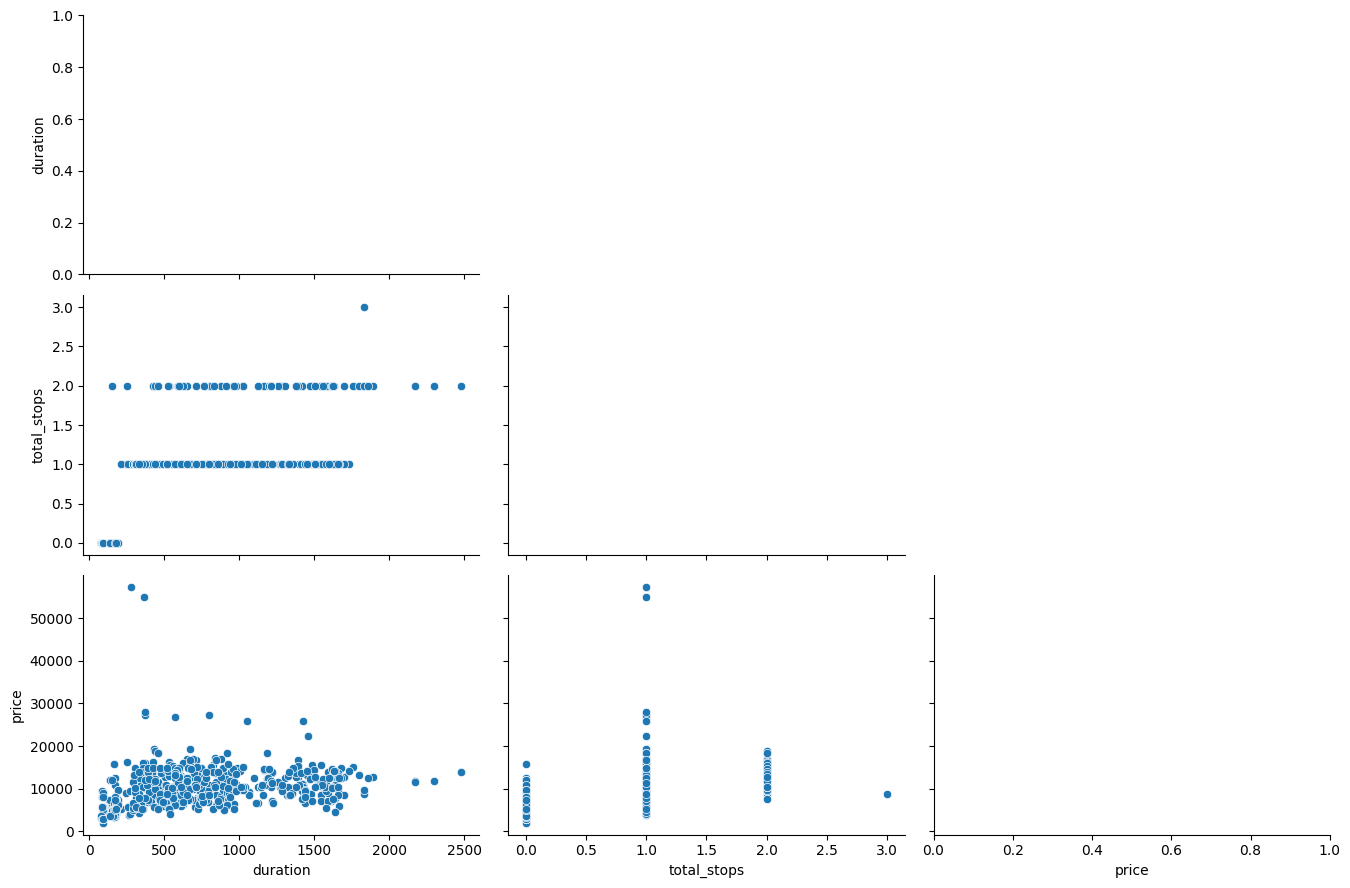

In [11]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

for reducing multicollinearity in data

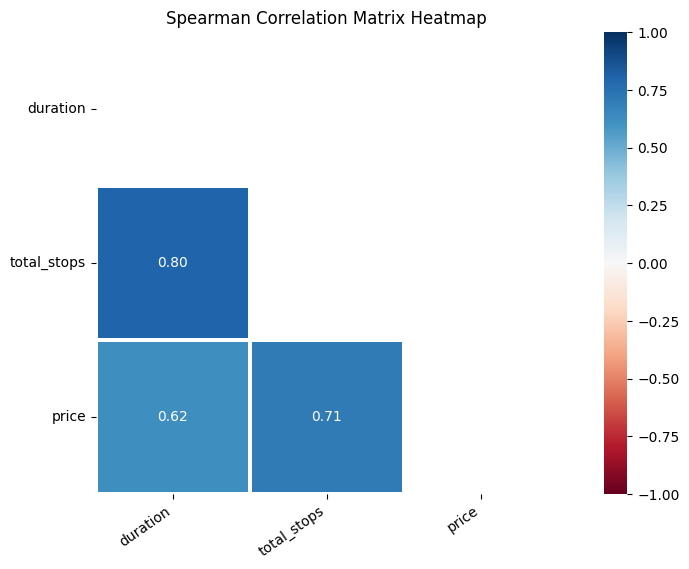

In [12]:
eda_helper_functions.correlation_heatmap(train)

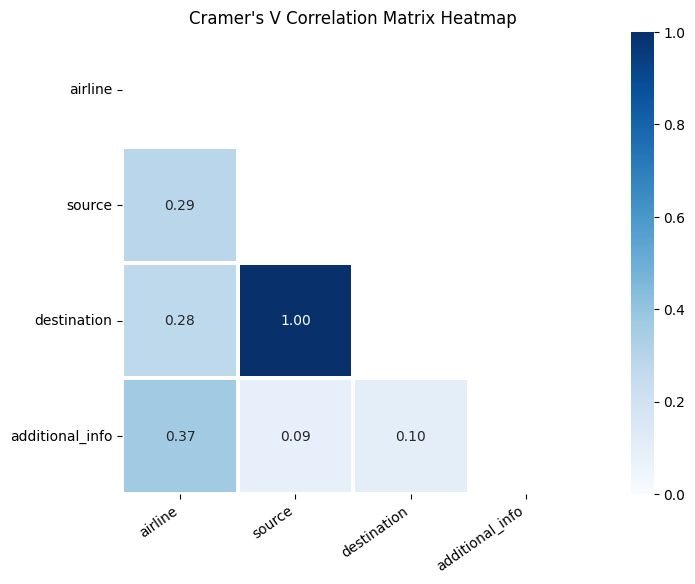

In [13]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis

In [14]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 Airline

In [15]:
eda_helper_functions.cat_summary(train ,"airline")

0                 Indigo
1              Air India
2            Jet Airways
3            Jet Airways
4              Air India
             ...        
635             Spicejet
636          Jet Airways
637            Air India
638    Multiple Carriers
639    Multiple Carriers
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,211


,count,percentage
category,,
Jet Airways,211,0.329688
Indigo,118,0.184375
Air India,117,0.182812
Multiple Carriers,87,0.135937
Spicejet,46,0.071875
Vistara,24,0.037500
Air Asia,22,0.034375
Goair,15,0.023438


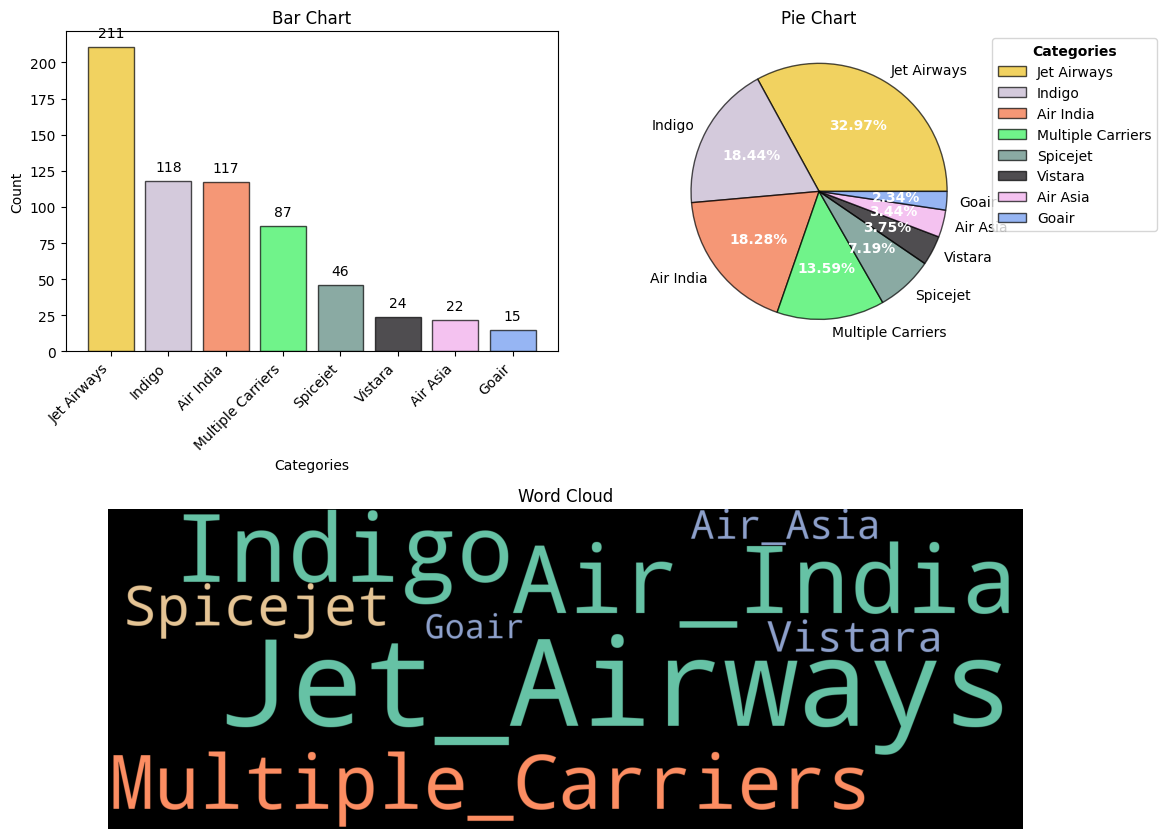

In [16]:
eda_helper_functions.cat_univar_plots(train ,"airline")

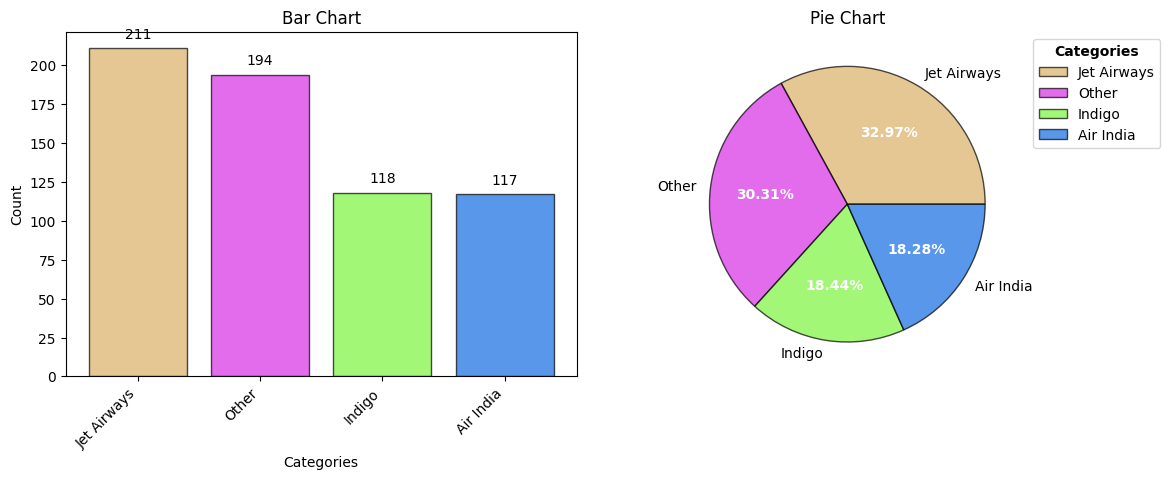

In [17]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)

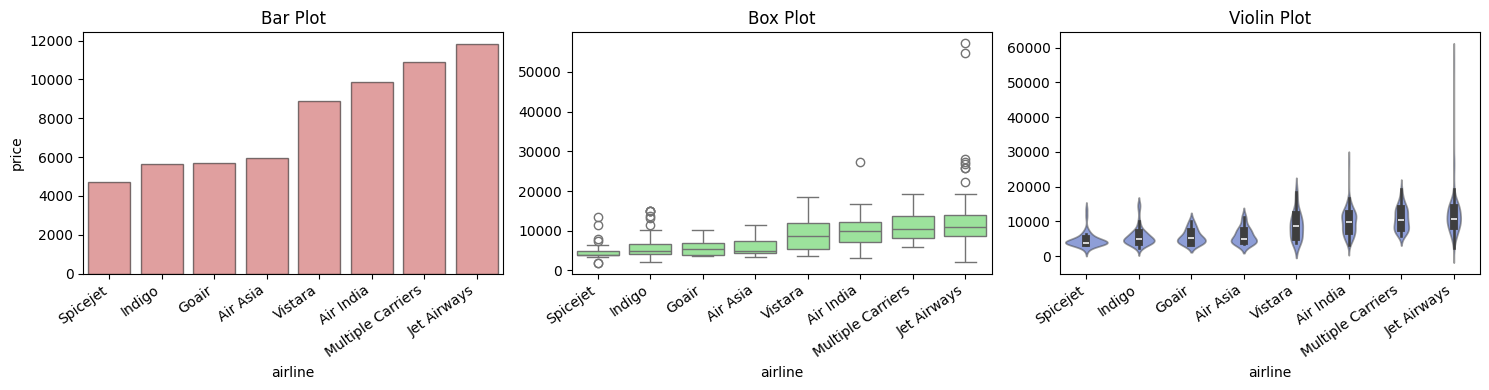

In [18]:
eda_helper_functions.num_cat_bivar_plots(data = train,num_var = "price",cat_var="airline")

In [19]:
eda_helper_functions.num_cat_hyp_testing(train, num_var = "price", cat_var = "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 36.494847294237914
- p-value              : 6.32475330662537e-43
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 276.03408242917567
- p-value              : 7.872210890068306e-56
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


In [20]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### Multivariate Analysis using Facetgrid

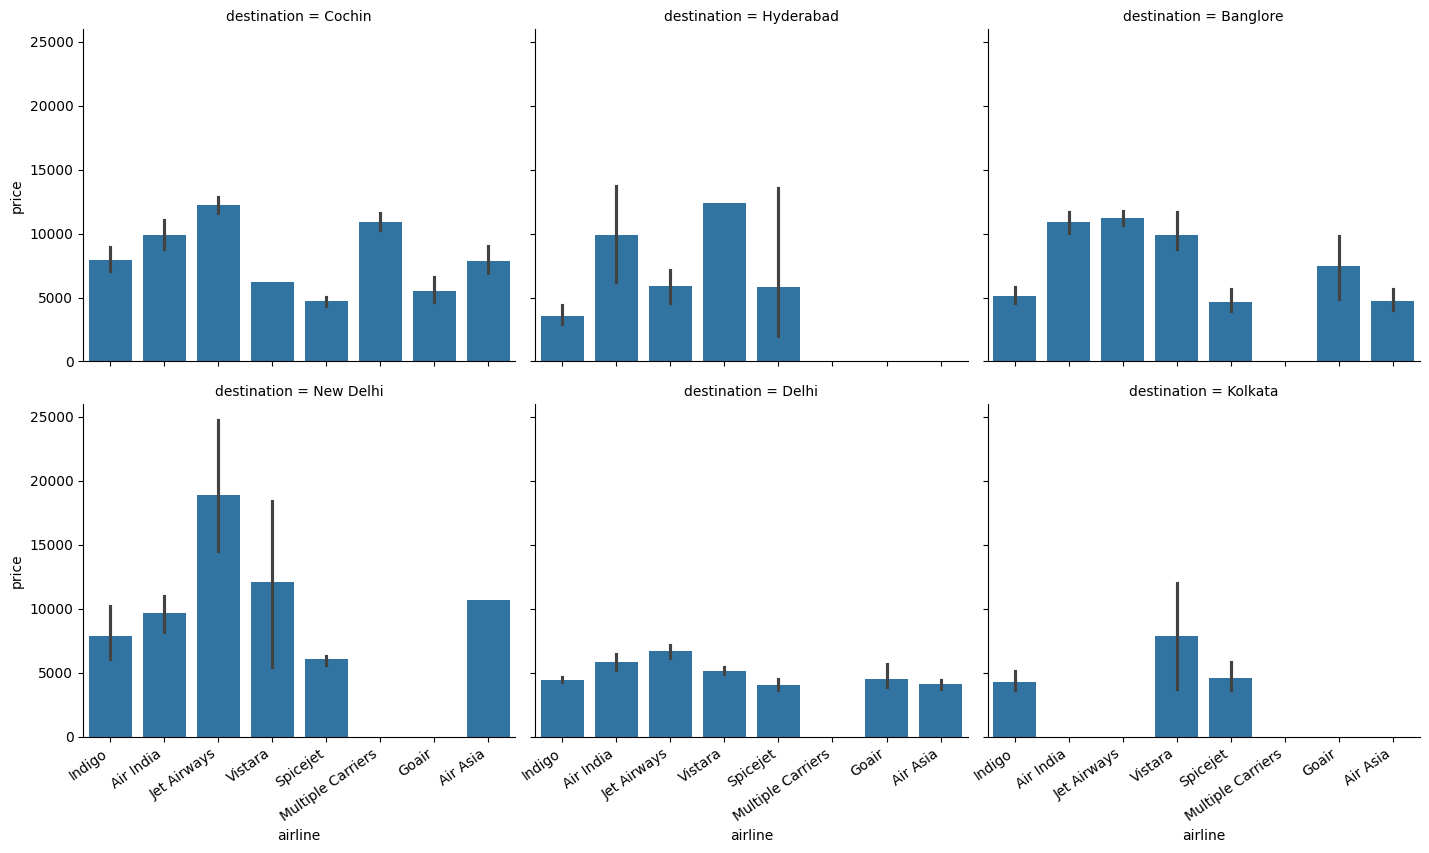

In [21]:
airline_grid = sns.FacetGrid(
    train,
    col = "destination",
    height = 4,aspect=1.2,  #height and breadth of graph
    sharey = True,
    col_wrap= 3
)

airline_grid.map(sns.barplot , "airline","price",order = train.airline.unique())
for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

## 8.2 Date of Journey :

In [22]:
train.date_of_journey

0     2019-06-01
1     2019-03-27
2     2019-03-06
3     2019-06-12
4     2019-03-24
         ...    
635   2019-05-24
636   2019-06-06
637   2019-06-27
638   2019-05-27
639   2019-05-27
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

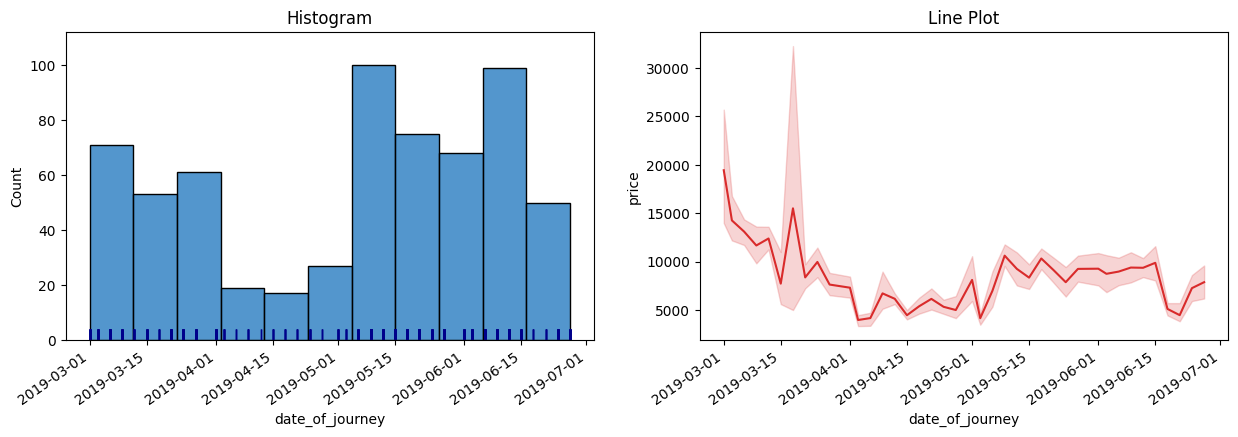

In [23]:
eda_helper_functions.dt_univar_plots(train,target= "price", var = "date_of_journey")

#### multivariate analysis

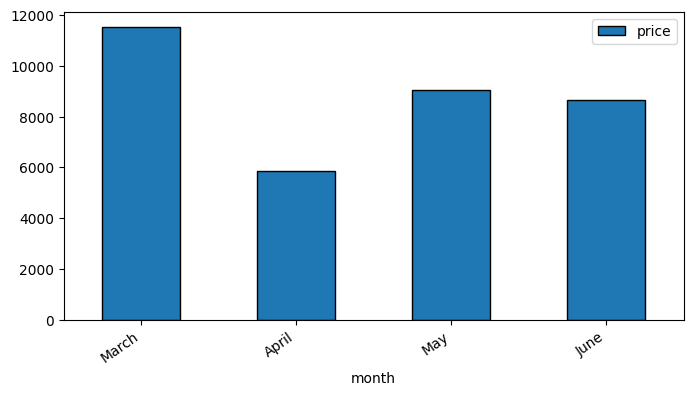

In [24]:
# Monthly Analysis :

(
    train
    .groupby(pd.Grouper(key = "date_of_journey",freq = "M"))
    .price.mean()
    .to_frame()  # convert into dataframe
    .set_axis(["March", "April", "May","June"],axis =0)
    .rename_axis(index = "month")
    .plot(
        kind ="bar",
        figsize = (8,4),
        edgecolor = "black"
    )
)

ax = plt.gca() 
eda_helper_functions.rotate_xlabels(ax)

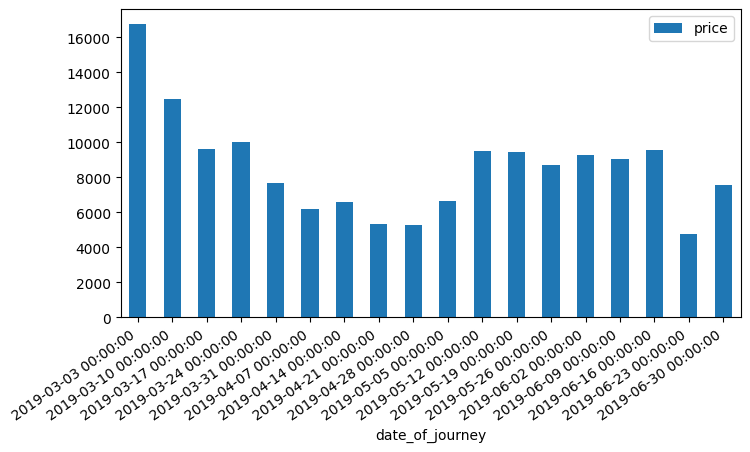

In [25]:
# Weekly analysis :

# Monthly Analysis :

(
    train
    .groupby(pd.Grouper(key = "date_of_journey", freq = 'W'))
    .price.mean()
    .to_frame()
    .plot(
        kind = "bar",
        figsize = (8,4)
    )
    
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

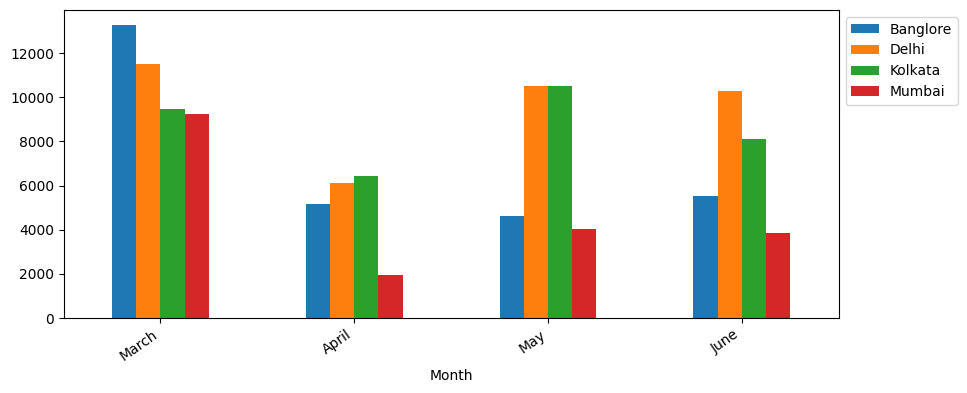

In [26]:
# inside each month what is the average price from source of jorney
(
    train
    .groupby([pd.Grouper(key = "date_of_journey",freq = 'M'),"source"])
    .price.mean()
    .unstack(fill_value = "0")
    .set_axis(["March","April","May","June"],axis =0)
    .rename_axis("Month")
    .plot(
             kind = "bar",
            figsize = (10,4)
         )
)

#get current axes
ax = plt.gca()
# set position of legend outside the graph area
ax.legend(
    loc = "upper left",
    bbox_to_anchor  = (1,1)
)

eda_helper_functions.rotate_xlabels(ax)

### 8.3 Departure Time

In [27]:
train.dep_time

0     2024-07-25 17:10:00
1     2024-07-25 13:30:00
2     2024-07-25 07:10:00
3     2024-07-25 14:05:00
4     2024-07-25 21:05:00
              ...        
635   2024-07-25 15:55:00
636   2024-07-25 19:45:00
637   2024-07-25 14:10:00
638   2024-07-25 17:50:00
639   2024-07-25 10:35:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

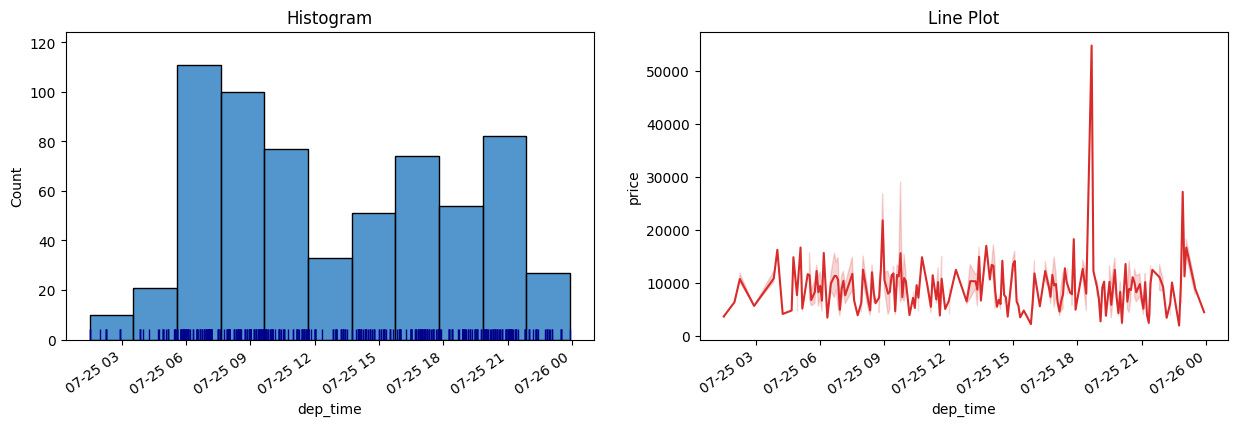

In [28]:
eda_helper_functions.dt_univar_plots(train,"dep_time","price")

As in the above analysis we are unable to find in which day shift(like morning, evening, afternoon) flights are booked most. So we are doing it with the below analysis

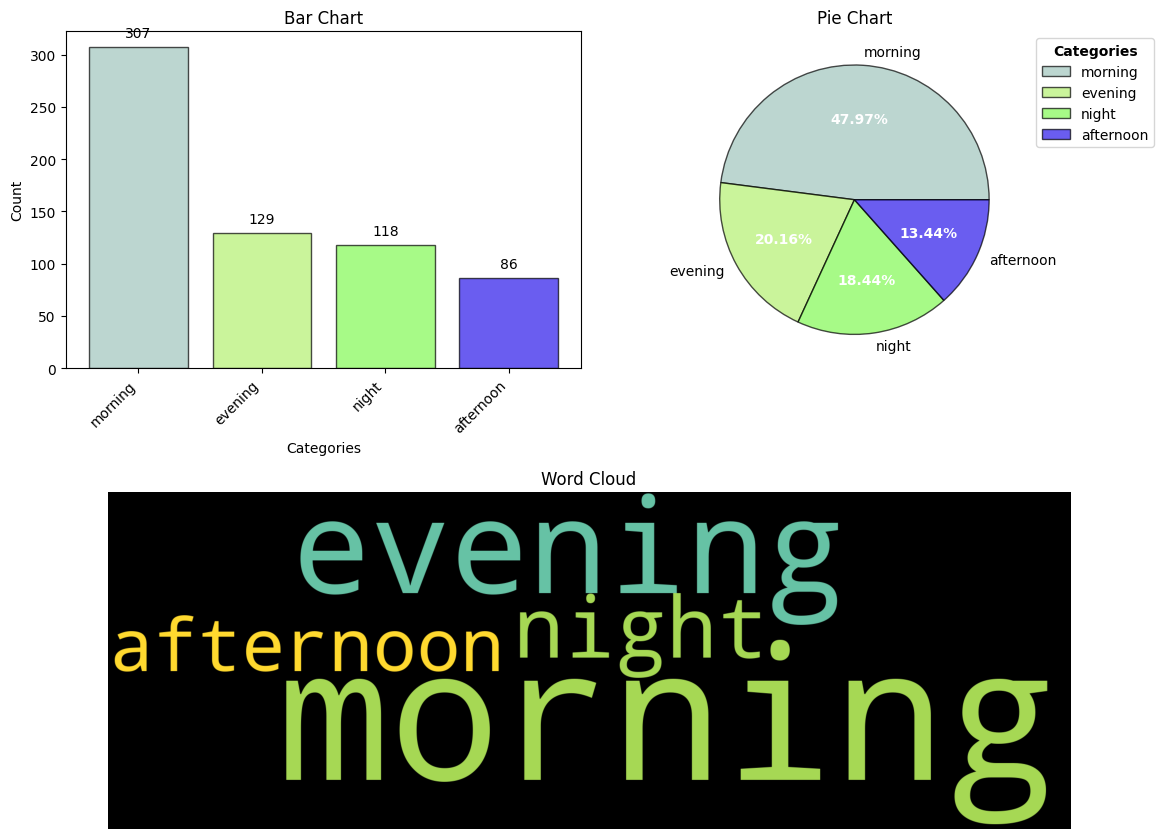

In [29]:
# .pipe() function accept series/ dataframe and ouptput series/dataframe respectibely 
#np.select([(<conditions>),<conditions>),<conditions>)],[<result1>,<result2>, <result3>],default="abc")   ---- select function
(
    train
    .assign(dep_time = lambda ser : (
        np.select([ser.dep_time.dt.hour.between(4,12,inclusive = "left"),
        ser.dep_time.dt.hour.between(12,16, inclusive =  "left"),
        ser.dep_time.dt.hour.between(16,20, inclusive="left")],
        ["morning", "afternoon","evening"],default="night"))
    )
    .pipe(eda_helper_functions.cat_univar_plots, "dep_time")
)


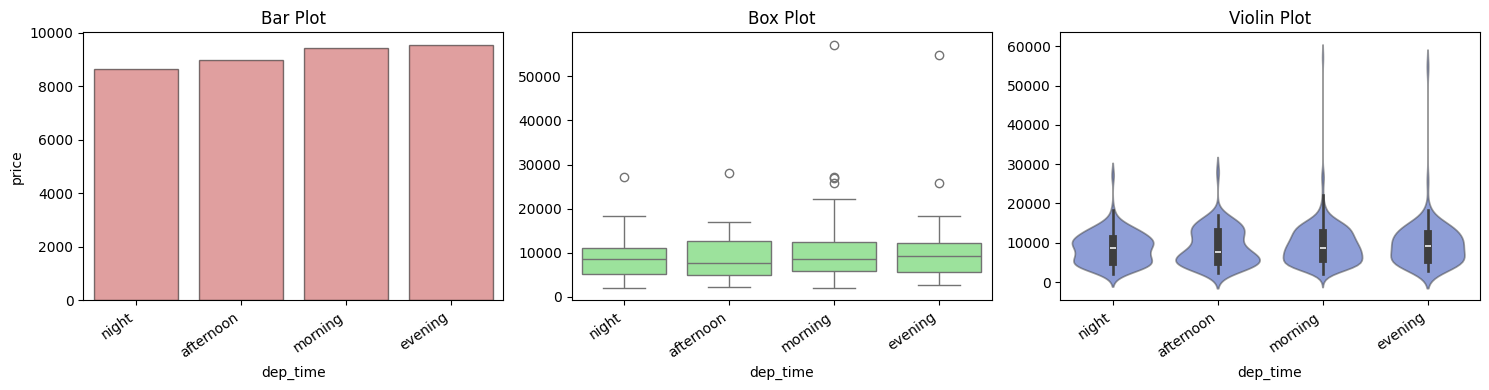

In [30]:

(
    train
    .assign(dep_time = lambda ser : (
        np.select([ser.dep_time.dt.hour.between(4,12,inclusive = "left"),
        ser.dep_time.dt.hour.between(12,16, inclusive =  "left"),
        ser.dep_time.dt.hour.between(16,20, inclusive="left")],
        ["morning", "afternoon","evening"],default="night"))
    )
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price", "dep_time")
)


### 8.4 Duration Summary

In [31]:
train.duration

0       500
1      1125
2        85
3      1155
4       170
       ... 
635     330
636     520
637     180
638     460
639     520
Name: duration, Length: 640, dtype: int64

In [32]:
eda_helper_functions.num_summary(train, "duration")

0       500
1      1125
2        85
3      1155
4       170
       ... 
635     330
636     520
637     180
638     460
639     520
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,80.0
5,135.0
10,150.0
25,175.0
50,552.5
75,925.0
90,1475.0
95,1625.0
99,1830.0


,value
mean,651.812500
trimmed mean (5%),620.876736
trimmed mean (10%),592.216797
median,552.500000


,value
var,251402.265258
std,501.400304
IQR,750.000000
mad,377.500000
coef_variance,0.769240


,value
skewness,0.849075
kurtosis,-0.179016


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 9.148960590479178e-21
Test Statistic       : 0.8920542567853869
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 22.16720395009372
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


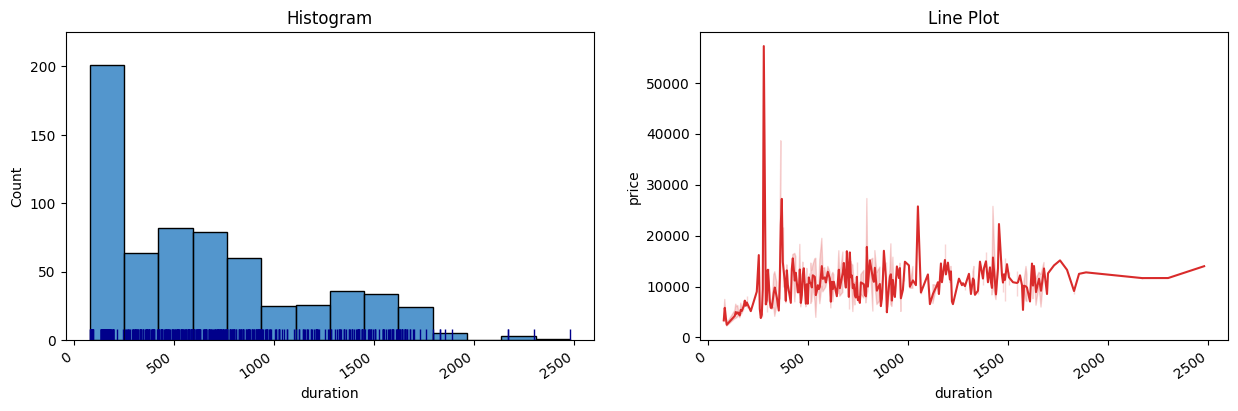

In [33]:
eda_helper_functions.dt_univar_plots(train,"duration","price")

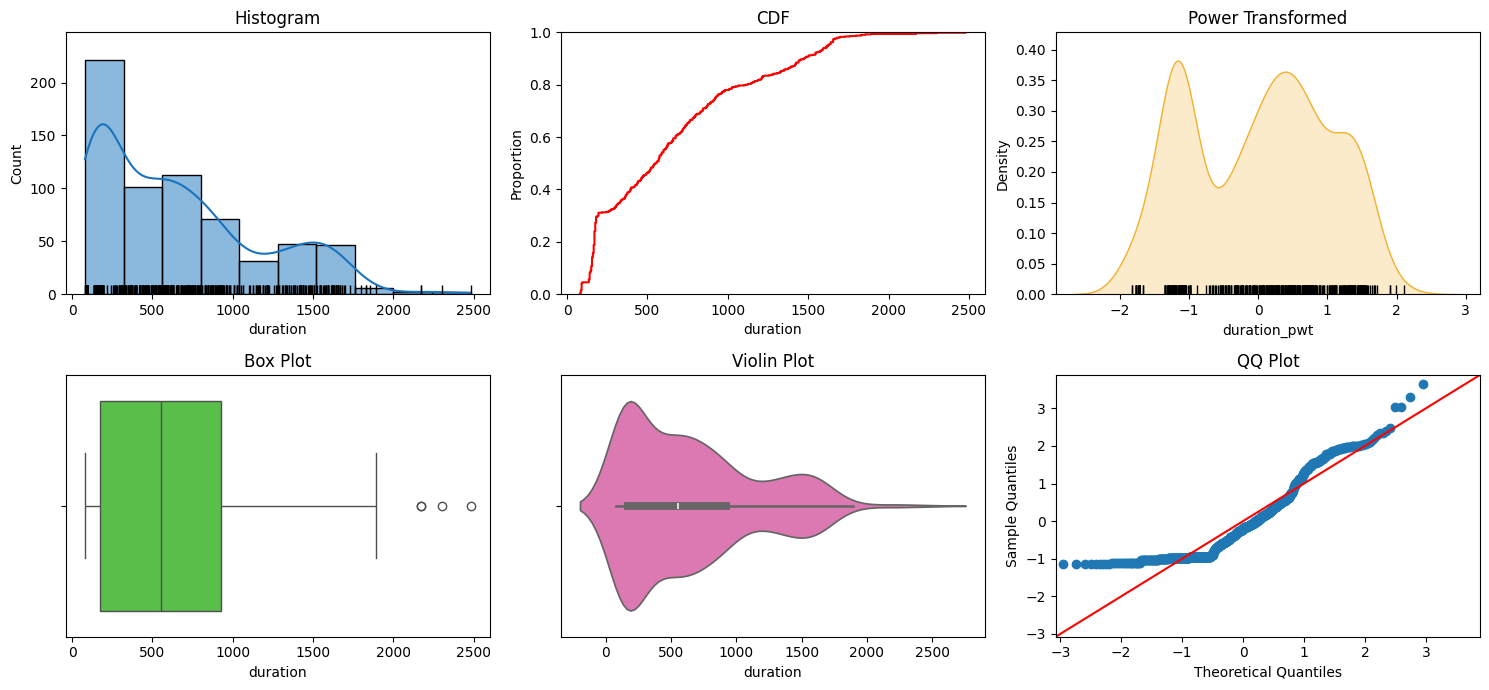

In [34]:
eda_helper_functions.num_univar_plots(train,"duration")

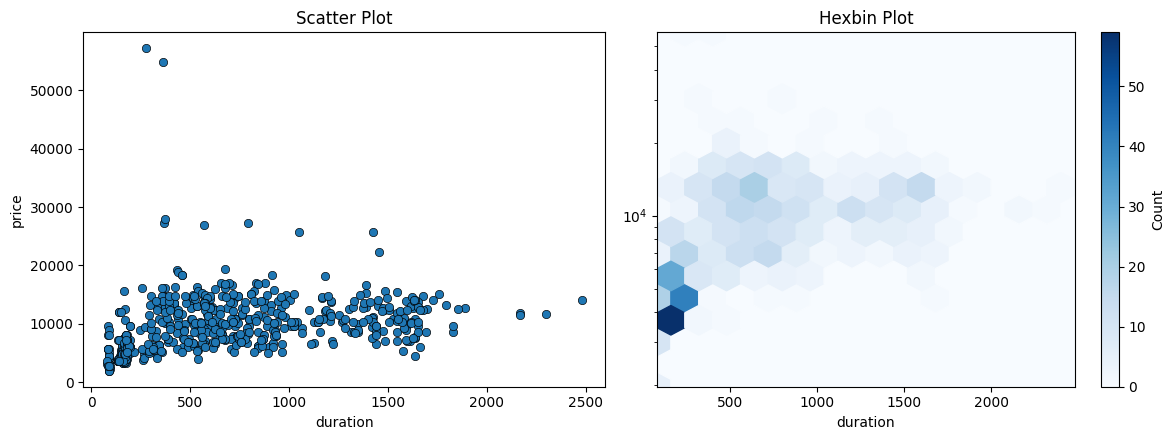

In [35]:
eda_helper_functions.num_bivar_plots(train,
                                     "duration",
                                     "price",
                                    hexbin_kwargs= dict(
                                        yscale = "log",
                                        gridsize = 15,
                                        cmap = "Blues"
                                    )
                                    )

 Doing Hypothesis testing for checking collinearity :

In [36]:
eda_helper_functions.num_num_hyp_testing(train,"duration","price")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.3813628281563352
- p-value              : 1.3816120423211658e-23
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6228801602492637
- p-value              : 4.8105131041491346e-70
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


#### multivariate analysis
expectations:
1. want basic scatter plot relation bettween price and duartion.
2. How duration and price are varying for each source

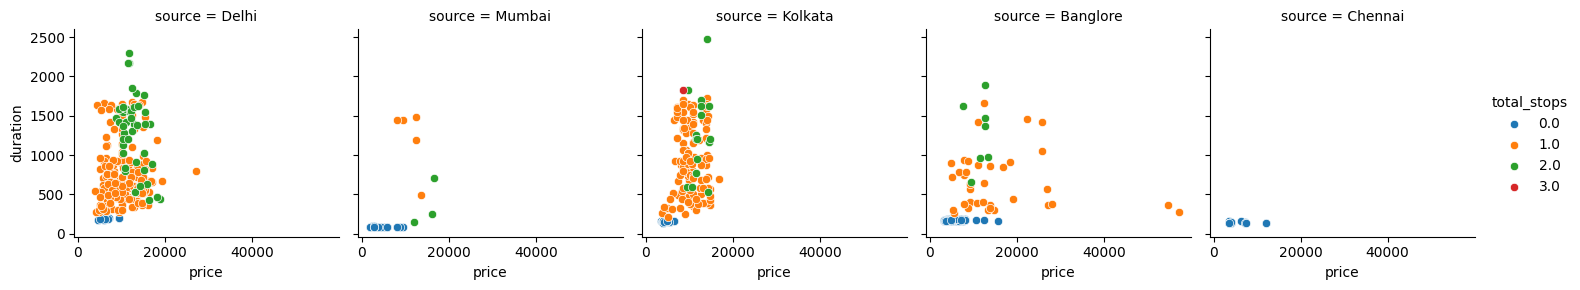

In [37]:
duration_grid = sns.FacetGrid(
    train,
    col = "source",
    hue = "total_stops",
    sharex = True,
    # col_wrap= 3
)

duration_grid.map(sns.scatterplot, "price", "duration")
duration_grid.add_legend()


Alert !

We found that chennai has no stops, it has direct flight only. and most of the sorces have 2 as total_stops.
Delhi, Kolkata and Banglore have more such flights.

In [38]:
eda_helper_functions.get_iqr_outliers(train,"duration")

Lower Limit : -950.0
Upper Limit : 2050.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
59,Air India,2019-03-03,Delhi,Cochin,2024-07-25 07:05:00,2024-07-25 19:15:00,2170,2.0,No info,11762
364,Air India,2019-03-03,Delhi,Cochin,2024-07-25 07:05:00,2024-07-25 19:15:00,2170,2.0,No info,11552
593,Jet Airways,2019-03-27,Delhi,Cochin,2024-07-25 05:25:00,2024-07-25 19:45:00,2300,2.0,No info,11664
175,Air India,2019-03-24,Kolkata,Banglore,2024-07-25 05:55:00,2024-07-25 23:15:00,2480,2.0,No info,13990


# OBSERVATIONS 

#### Airline :
1. Price is directly proportion to the airline.
2. Jet Airways has highest count.

#### date_of_journey:
1. Prices of ticket are highest in March.
2. Then after may and June has almost equal price (Constant)
#### dep_time :
1. Most flights are booked between 6am - 7am and then 9pm - 10pm in evening.
#### duration:
1. it is left skewed feature.
2. Short duration flights are larger in count.
3. The variables duration and price are correlated
4. During Multivariate analysis we found that chennai has no stops, it has diresct flight only. and most of the sorces have 2 as total_stops.
Delhi, Kolkata and Banglore have more such flights.

# 9. Automated EDA

In [66]:
from ydata_profiling import ProfileReport

In [68]:
report = ProfileReport(train)

In [69]:
report.to_file(output_file="autoMated_EDA_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]